# Telecom Churn Case Study

#### Importing dataset and necessary libraries

In [1]:
import sys
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,10]
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 350)
pd.set_option('display.max_colwidth', -1)

In [2]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [3]:
dictdata=pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
telecom=pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


dictdata

### Step 1: Data Selection
#### Step 1.1 Fiter data - Only High Value customers needed for analysis
 
  * ##### Lets define high value customers as follows: 
  ###### *"Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)."*



In [6]:
tele=telecom.copy(deep=True)

In [7]:
# Derive a feature from total recharge amounts of 6 and 7 months
avg=(tele.total_rech_amt_6+tele.total_rech_amt_7)/2
tele.insert(2, "avg_rech_6_and_7", avg, True) 
# filter the high value customers as the 70th percentile of the derived feature
tele=tele[tele.avg_rech_6_and_7>=tele.avg_rech_6_and_7.quantile(.70)]
tele.shape

(30011, 227)

- Drop the old features from which new has been derived

In [8]:
tele=tele.drop(["total_rech_amt_6","total_rech_amt_7"],1)
tele.shape

(30011, 225)

#### Step 1.2 Tag churners and remove attributes of the churn phase

- Tag churned customers (churn=1, else 0) based on the fourth month as follows:
*Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes needed to tag churners are:*
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [9]:
# Check missing values in these attributes:
tele[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [10]:
# as there are no missing values we can use these attributes for tagging churn 
tele[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head(5)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [11]:
# condition to tag churn is thatall these attributes should have value 0:
condition =(tele["total_ic_mou_9"]==0)&(tele["total_og_mou_9"]==0)&(tele["vol_2g_mb_9"]==0)&(tele["vol_3g_mb_9"]==0)

In [12]:
# Deriving  new Attribute "Churn" from the chosen four features.
tele.Churned = np.where(condition, '1','0')
tele.insert(2, "Churn", tele.Churned, True)
tele.Churn=tele.Churn.astype(int)
print("After creating one new attribute called Churn, the shape of dataframe: ",tele.shape)
tele.head()

After creating one new attribute called Churn, the shape of dataframe:  (30011, 226)


,mobile_number,circle_id,Churn,avg_rech_6_and_7,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,109,1,1185.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,5

In [13]:
# we call this new dataframe as Churn which will not have any other attributes of month 9
tele_churn=tele.copy(deep=True)
tele_churn.shape

(30011, 226)

In [14]:
# number of columns for month 9 to be dropped
print("number of columns for last month-September are: ",tele_churn.filter(like="_9").shape[1])
tele_churn=tele_churn.drop(tele_churn.filter(like="_9"),axis=1)
#after dropping 50 columns for the month 9 or September we should have 173 columns
tele_churn.shape

number of columns for last month-September are:  54


(30011, 172)

In [15]:

tele_churn=tele_churn.drop(tele_churn.filter(like="sep"),axis=1)
tele_churn.shape

(30011, 171)

##### The data is now filtered and consists of only High Vlaue Customers as per the defined criteria we proceed towards data cleaning

### Step 2: Data Cleaning

In [16]:
#checking the missing data in 'last_date_of_month_7' and  'last_date_of_month_8' and observing Derived feature CHurn
# implies that phase of second and third month , customers whose data is missing for month_8 have all churned
tele_churn[(tele_churn[['last_date_of_month_7', 'last_date_of_month_8']].isnull().sum(axis=1)>0)][['last_date_of_month_7', 'last_date_of_month_8','Churn']].head(10)

,last_date_of_month_7,last_date_of_month_8,Churn
188,7/31/2014,NaN,1
490,NaN,NaN,1
723,7/31/2014,NaN,1
845,7/31/2014,NaN,1
1524,7/31/2014,NaN,1
1555,NaN,NaN,1
1952,7/31/2014,NaN,1
2360,7/31/2014,NaN,1
3506,NaN,NaN,1
3667,7/31/2014,NaN,1


In [17]:
numerics = [ 'float16', 'float32', 'float64','int16', 'int32', 'int64']


In [18]:
tele_churn.filter(like="date").isnull().sum()

last_date_of_month_6        0    
last_date_of_month_7        31   
last_date_of_month_8        157  
date_of_last_rech_6         62   
date_of_last_rech_7         114  
date_of_last_rech_8         594  
date_of_last_rech_data_6    18614
date_of_last_rech_data_7    18349
date_of_last_rech_data_8    18257
dtype: int64

In [19]:
tele_churn[['last_date_of_month_6','date_of_last_rech_6','date_of_last_rech_data_6']].describe()

,last_date_of_month_6,date_of_last_rech_6,date_of_last_rech_data_6
count,30011,29949,11397
unique,1,30,30
top,6/30/2014,6/30/2014,6/30/2014
freq,30011,8724,927


In [20]:
# 'last_date_of_month_6' can be dropped as there is no variance and no missing data
tele_churn=tele_churn.drop('last_date_of_month_6',axis=1)

##### imputing 6, 7 and 8 th month date attributes with 1 to depict missing data as a high possibility of churn

In [21]:
date_attr=tele_churn.filter(like="date").columns
tele_churn[date_attr]=tele_churn[date_attr].fillna(1)

for i in date_attr:
    tele_churn[i]=tele_churn[i].apply(lambda x:0 if x!=1 else 1)

In [22]:

tele_churn[date_attr]=tele_churn[date_attr].astype(int)
#tele_churn[date_attr].describe()

#### Correlations

In [23]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

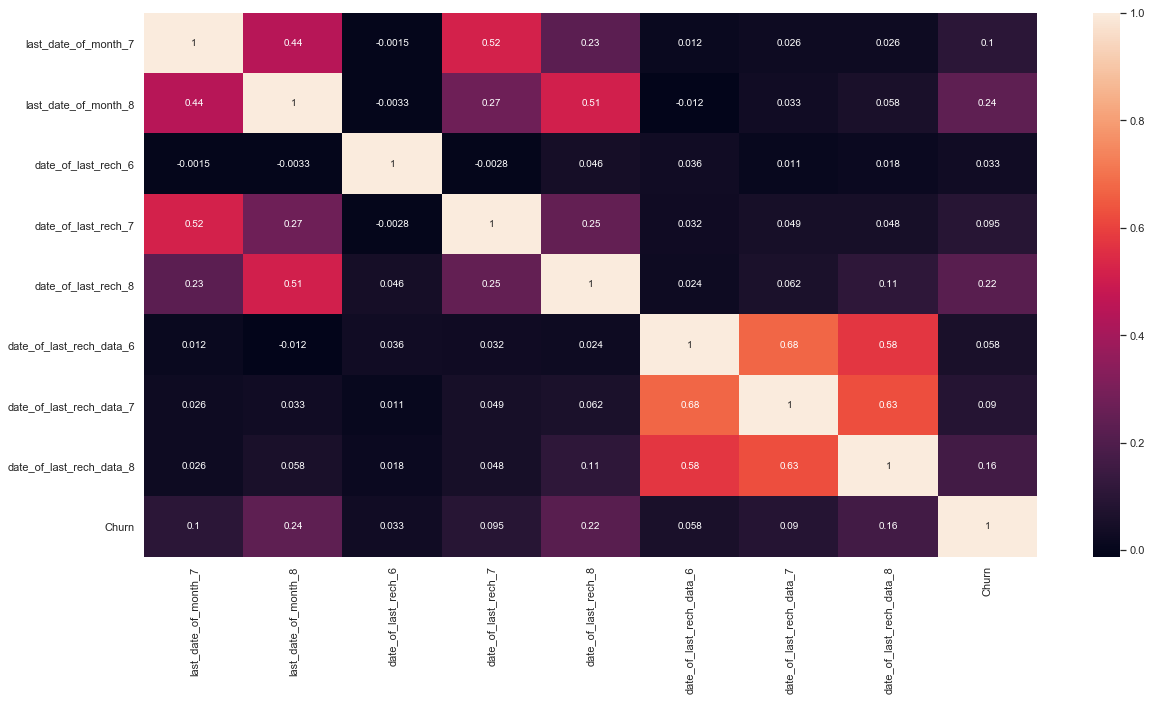

In [24]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(tele_churn[['last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8','Churn']].corr(),annot = True)
plt.show()

In [25]:
# drop the date columns with high correlation
tele_churn=tele_churn.drop(["date_of_last_rech_data_7","date_of_last_rech_data_6"],axis=1)

In [26]:
tele_clean=tele_churn.copy(deep=True)

In [27]:
tele_clean=tele_clean.fillna(0)

In [28]:
tele_clean.columns

Index(['mobile_number', 'circle_id', 'Churn', 'avg_rech_6_and_7',
       'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=168)

#### Removing the attributes which have - no variance

In [29]:
n=tele_clean.std()==0
n[n==True]

circle_id           True
loc_og_t2o_mou      True
std_og_t2o_mou      True
loc_ic_t2o_mou      True
std_og_t2c_mou_6    True
std_og_t2c_mou_7    True
std_og_t2c_mou_8    True
std_ic_t2o_mou_6    True
std_ic_t2o_mou_7    True
std_ic_t2o_mou_8    True
dtype: bool

In [30]:
tele_clean=tele_clean.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],axis=1)

In [31]:
churnclean_corr=tele_clean.corr().Churn.sort_values(ascending=False).head(15)
churnclean_corr

Churn                       1.000000
last_date_of_month_8        0.235812
date_of_last_rech_8         0.217701
date_of_last_rech_data_8    0.162199
std_og_mou_6                0.137936
std_og_t2m_mou_6            0.106372
last_date_of_month_7        0.104564
std_og_t2t_mou_6            0.097457
date_of_last_rech_7         0.094759
roam_og_mou_7               0.093107
total_og_mou_6              0.084416
onnet_mou_6                 0.074631
roam_og_mou_8               0.072375
total_rech_num_6            0.072270
roam_ic_mou_7               0.068258
Name: Churn, dtype: float64

### Step 3: Deriving metrics

In [32]:
# Top Correlations of explanatory variables
cor=tele_clean.loc[:,(tele_clean.columns !='mobile_number') & (tele_clean.columns !='circle_id') ].corr().abs().unstack()
cornot1 = cor[cor!=1]
cornot1.sort_values(ascending=False).drop_duplicates().head()

sachet_2g_8      count_rech_2g_8     0.981607
count_rech_2g_7  sachet_2g_7         0.979649
count_rech_2g_6  sachet_2g_6         0.976342
arpu_8           total_rech_amt_8    0.953725
isd_og_mou_7     isd_og_mou_8        0.941347
dtype: float64

In [33]:
tele_clean.head()

,mobile_number,circle_id,Churn,avg_rech_6_and_7,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
7,7000701601,109,1,1185.0,0,0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,3638,1580,790,1580,0,0,0,0,0,779,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74
8,7001524846,109,0,519.0,0,0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,120,90,154,30,0,0,0,50,0,10,0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16
13,7002191713,109,0,380.0,0,0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.

In [34]:
tele_clean.filter(like="count_rech").columns

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'],
      dtype='object')

In [35]:
tele_clean.shape

(30011, 159)

In [36]:
# Derive a feature total recharge count of data 2g and 3g for months 6,7and8
total=tele_clean.count_rech_2g_6+tele_clean.count_rech_2g_7+tele_clean.count_rech_2g_8+tele_clean.count_rech_3g_6+tele_clean.count_rech_3g_7+tele_clean.count_rech_3g_8
tele_clean.insert(2, "count_rech_2g_3g_mon_678", total, True) 
tele_clean=tele_clean.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'],1)
tele_clean.shape

(30011, 154)

In [37]:
tele_clean.filter(like="sachet").columns

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [38]:
# Derive a feature total recharge count of data 2g and 3g for months 6,7and8
tot=tele_clean.sachet_2g_6+tele_clean.sachet_2g_7+tele_clean.sachet_2g_8+tele_clean.sachet_3g_6+tele_clean.sachet_3g_7+tele_clean.sachet_3g_8
tele_clean.insert(3, "totalsachet_2g_3g_mon_678", tot, True) 
tele_clean=tele_clean.drop(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],1)
tele_clean.shape

(30011, 149)

In [39]:
churn_corr=tele_clean.corr().Churn.sort_values(ascending=False).head(15)
churn_corr

Churn                       1.000000
last_date_of_month_8        0.235812
date_of_last_rech_8         0.217701
date_of_last_rech_data_8    0.162199
std_og_mou_6                0.137936
std_og_t2m_mou_6            0.106372
last_date_of_month_7        0.104564
std_og_t2t_mou_6            0.097457
date_of_last_rech_7         0.094759
roam_og_mou_7               0.093107
total_og_mou_6              0.084416
onnet_mou_6                 0.074631
roam_og_mou_8               0.072375
total_rech_num_6            0.072270
roam_ic_mou_7               0.068258
Name: Churn, dtype: float64

#### Churn rate 

In [40]:
churn = (sum(tele_clean['Churn'])/len(tele_clean['Churn'].index))*100
print("The telecom churn rate is ",churn)

The telecom churn rate is  8.64016527273333


#### Lets Visualise some features

In [41]:
tele_clean.columns

Index(['mobile_number', 'circle_id', 'count_rech_2g_3g_mon_678',
       'totalsachet_2g_3g_mon_678', 'Churn', 'avg_rech_6_and_7',
       'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=149)

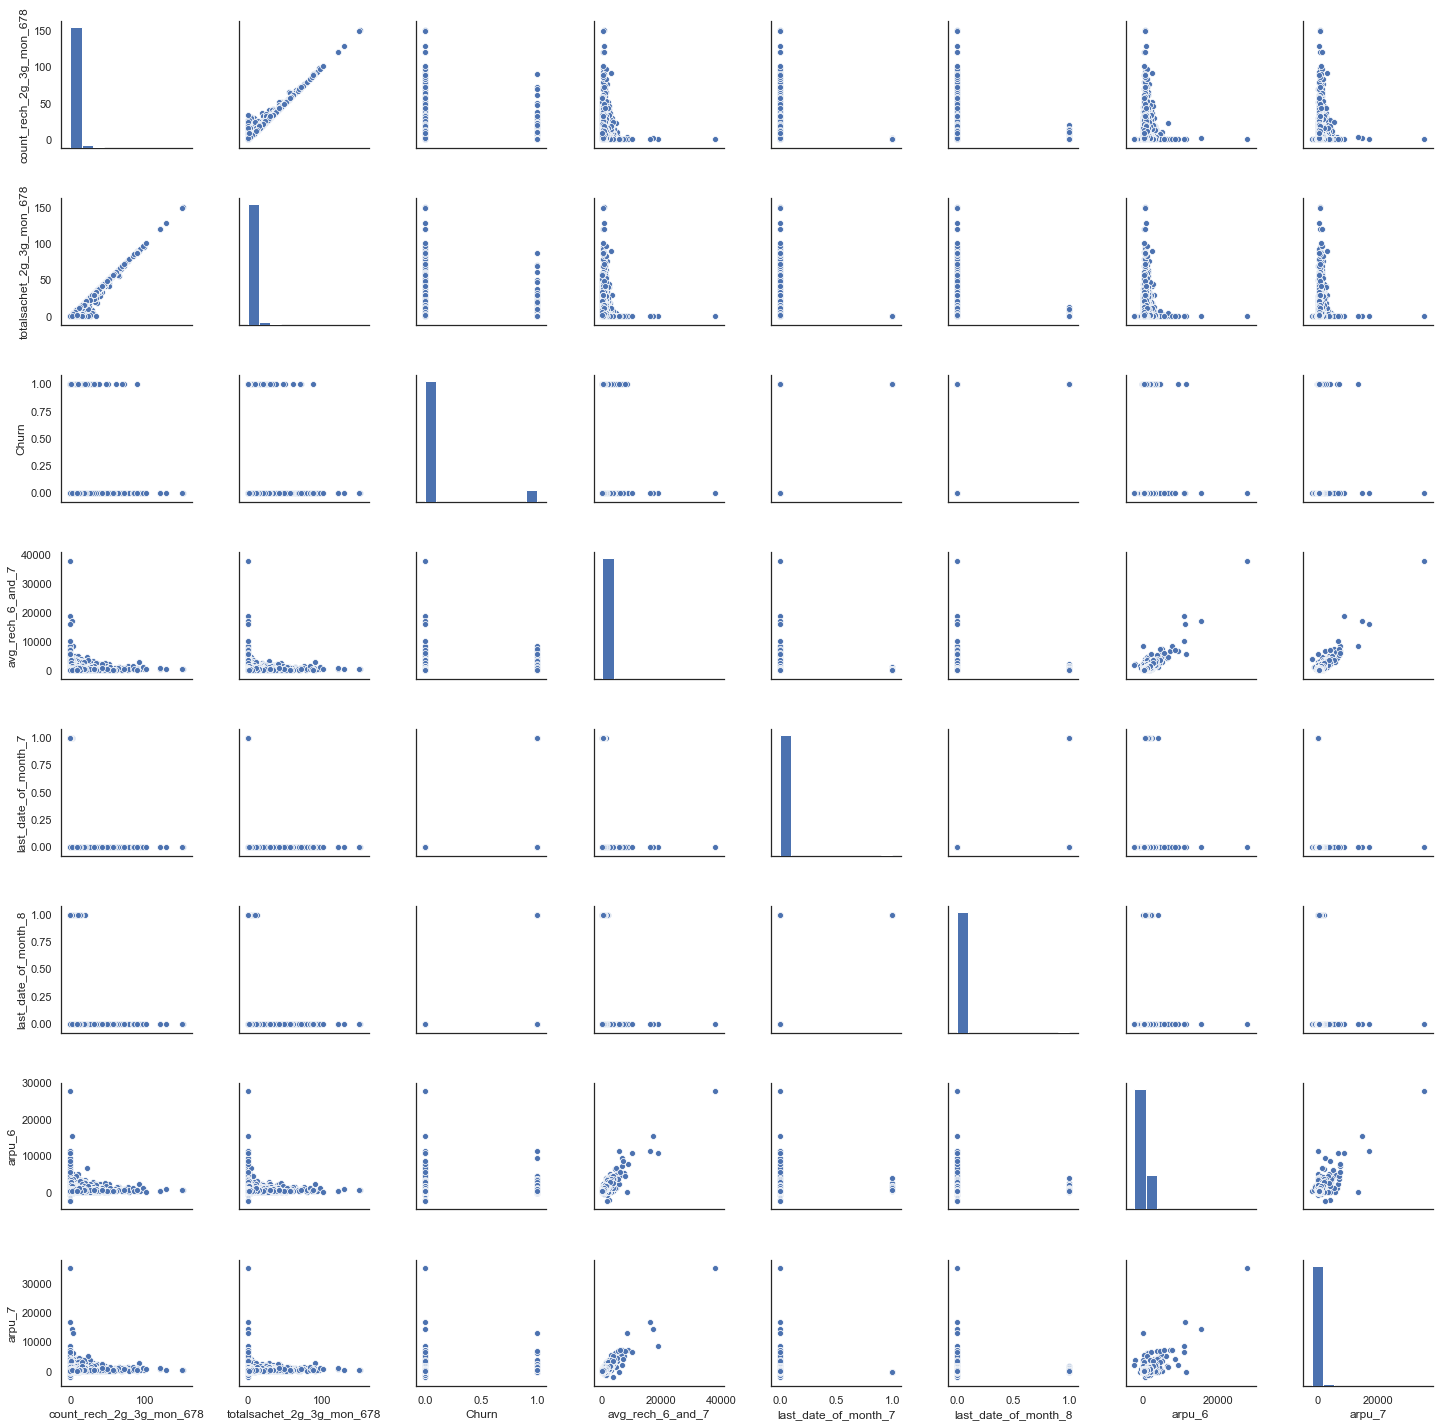

In [42]:
sns.pairplot(tele_clean[['count_rech_2g_3g_mon_678',
       'totalsachet_2g_3g_mon_678', 'Churn', 'avg_rech_6_and_7',
       'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7']])

In [43]:
upsamp_corr.index

NameError: name 'upsamp_corr' is not defined

In [ ]:
# checking pairplot of the explanatory features which are highly correlated with Target
sns.pairplot(tele_clean[['Churn', 'last_date_of_month_8', 'date_of_last_rech_8',
       'date_of_last_rech_data_8', 'std_og_mou_6', 'std_og_t2m_mou_6',
       'last_date_of_month_7', 'std_og_t2t_mou_6', 'date_of_last_rech_7',
       'roam_og_mou_7', 'total_og_mou_6', 'onnet_mou_6', 'roam_og_mou_8',
       'total_rech_num_6', 'roam_ic_mou_7']])

### Step 4: Model building

#### Train_test split and feature scaling

In [ ]:
# Putting feature variable to X
X = tele_clean.drop(['mobile_number', 'circle_id', 'Churn'], axis=1)
# Putting response variable to y
y = tele_clean['Churn']
from sklearn.model_selection import train_test_split
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit transform train set which is imbalanced
X_train = scaler.fit_transform(X_train)

In [ ]:
# using imbalanced transform test set
X_test = scaler.transform(X_test)

#### Step 4.1.1 Model using Boosting on train data which has all features

#### - xgBoost classifier

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)



In [ ]:
#creating a dataframe for predictions
y_pred_test=pd.DataFrame(y_prob)
y_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_pred_test[1]})
y_test_final['CustID'] = y_test.index


##### ROC curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_final.Churn, y_test_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_test_final.Churn, y_test_final.Churn_Prob)

####  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [55]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_final[i]= y_test_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


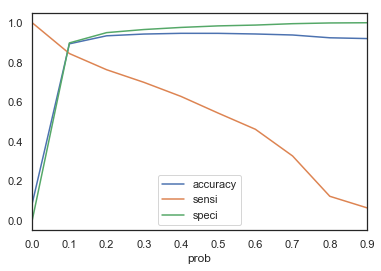

In [56]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_final.Churn, y_test_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [53]:
y_test_final['final_predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
confusion2 = metrics.confusion_matrix(y_test_final.Churn, y_test_final.final_predicted)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate: ",FP/ float(TN+FP))

Sensitivity:  0.8441558441558441
Specificity:  0.8979839689094
false postive rate:  0.10201603109059995


In [54]:
accuracy = metrics.accuracy_score(y_test_final.Churn, y_test_final.final_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test_final.Churn, y_test_final.final_predicted)
print("recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test_final.Churn, y_test_final.final_predicted)
print("precison: %.2f%%" % (precision * 100.0))

Accuracy: 89.34%
recall: 84.42%
precison: 43.62%


- SMOTE(used only for checking performance, chosen upsampling instead)

### PCA - using PCA for Dimensionality reduction here as there is a lot of milticollinearity

In [57]:
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X_train.shape

(21007, 146)

In [58]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [59]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [60]:
pca.components_

array([[ 2.72076921e-02,  1.78834739e-02,  2.59426438e-03, ...,
         1.52453300e-02,  2.33285713e-02,  1.57410426e-02],
       [ 2.82547066e-03, -1.60697552e-03, -4.83039664e-04, ...,
         2.87419963e-03,  1.56413605e-02,  1.38124127e-02],
       [-2.58636942e-03, -2.04825121e-03,  2.22248961e-04, ...,
        -2.42175170e-03, -6.98117309e-03,  6.68999645e-03],
       ...,
       [-9.95258724e-09, -9.59345750e-09, -4.70396705e-07, ...,
         9.90399462e-09,  8.94685116e-09,  3.04389955e-08],
       [-0.00000000e+00, -8.28969890e-01,  1.36175793e-16, ...,
        -5.03069808e-17, -1.07552856e-16, -8.84708973e-17],
       [ 8.75968706e-01, -2.59279345e-01, -5.55111512e-17, ...,
        -2.46520469e-17, -4.39643981e-17,  3.50366708e-17]])

#### Looking at the screeplot to assess the number of needed principal components

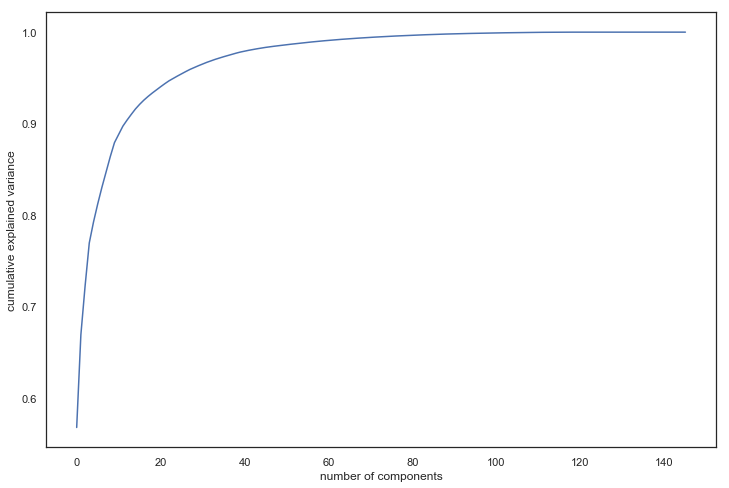

In [61]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 20 components are enough to describe 90% of the variance in the dataset
- We'll choose 20 components for our modeling

In [62]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

#### Basis transformation - getting the data onto our PCs

In [63]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 20)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [64]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

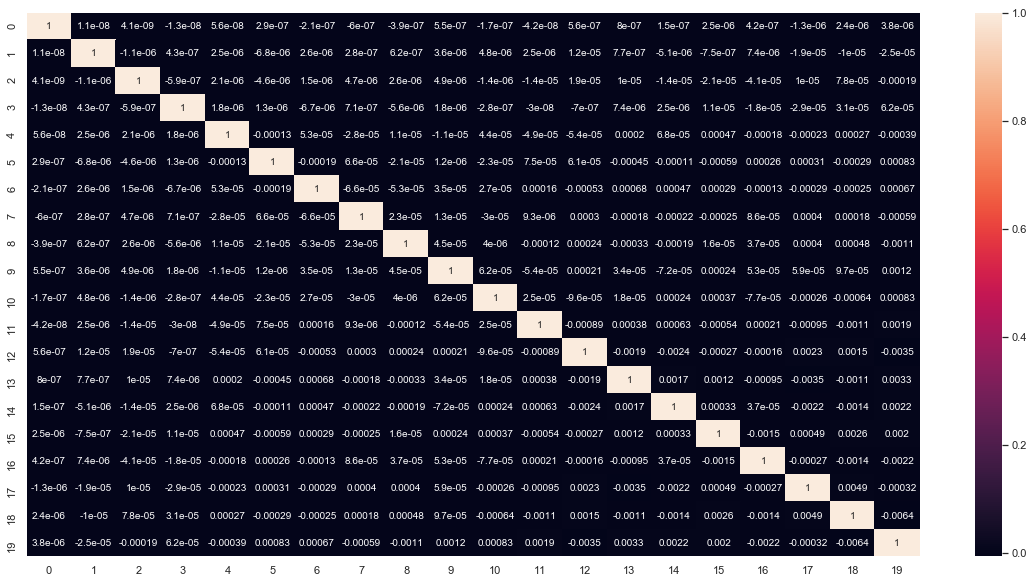

In [65]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [66]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.004898869787880833 , min corr:  -0.006422817924429135


#### Indeed - there is no correlation between any two components! 
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [67]:
#Applying selected components to the test data - 12 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 20)

#### Step 4.1.3 Model logistic regression on Principal Components


In [68]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [69]:
#Making prediction on the test data
y_prob = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_prob))

'0.86'

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [70]:
y_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_prob})

y_test_final['CustID'] = y_test.index


##### ROC curve

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_final.Churn, y_test_final.Churn_Prob, drop_intermediate = False )

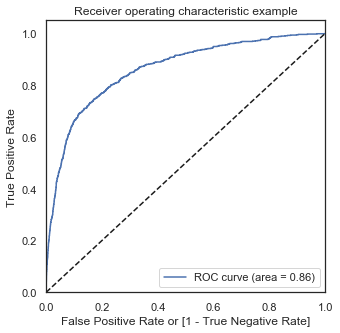

In [72]:
draw_roc(y_test_final.Churn, y_test_final.Churn_Prob)

####  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_final[i]= y_test_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


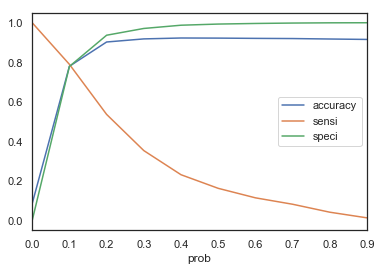

In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_final.Churn, y_test_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [75]:
y_test_final['final_predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
confusion2 = metrics.confusion_matrix(y_test_final.Churn, y_test_final.final_predicted)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate: ",FP/ float(TN+FP))

Sensitivity:  0.7896103896103897
Specificity:  0.7788438183143065
false postive rate:  0.22115618168569345


In [76]:
accuracy = metrics.accuracy_score(y_test_final.Churn, y_test_final.final_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test_final.Churn, y_test_final.final_predicted)
print("recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test_final.Churn, y_test_final.final_predicted)
print("precison: %.2f%%" % (precision * 100.0))

Accuracy: 77.98%
recall: 78.96%
precison: 25.03%


#### Step 4.1.4 xgB on pca data

In [77]:
from xgboost import XGBClassifier
learner2_pca = XGBClassifier()
model2_pca=learner2_pca.fit(df_train_pca,y_train)
#Making prediction on the test data
y_prob = model2_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_prob))



'0.88'

In [78]:
y_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_prob})

y_test_final['CustID'] = y_test.index

y_test_final['final_predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_test_final.head()

,Churn,Churn_Prob,CustID,final_predicted
0,0,0.733496,29360,1
1,0,0.136717,49979,1
2,0,0.014364,90612,0
3,0,0.030584,87007,0
4,0,0.028374,91852,0


In [79]:
confusion2 = metrics.confusion_matrix(y_test_final.Churn, y_test_final.final_predicted)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate: ",FP/ float(TN+FP))

Sensitivity:  0.7857142857142857
Specificity:  0.8362885596307992
false postive rate:  0.16371144036920088


In [80]:
accuracy = metrics.accuracy_score(y_test_final.Churn, y_test_final.final_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test_final.Churn, y_test_final.final_predicted)
print("recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test_final.Churn, y_test_final.final_predicted)
print("precison: %.2f%%" % (precision * 100.0))

Accuracy: 83.20%
recall: 78.57%
precison: 30.98%


### Step 4.1.5 Fifth model - Random forest classifier - Imbalance handling with "class_weights"

In [81]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=100,random_state=49,
                             class_weight="balanced").fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict_proba(X_test)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [82]:
y_test_pred = pd.DataFrame(rfc_pred)
y_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred[1]})
y_test_final['CustID'] = y_test.index

##### ROC curve

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_final.Churn, y_test_final.Churn_Prob, drop_intermediate = False )

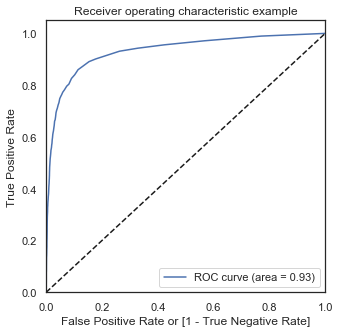

In [84]:
draw_roc(y_test_final.Churn, y_test_final.Churn_Prob)

####  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_final[i]= y_test_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


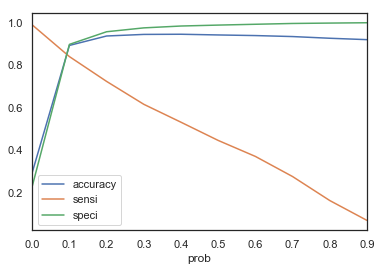

In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_final.Churn, y_test_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [87]:
y_test_final['final_predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
confusion2 = metrics.confusion_matrix(y_test_final.Churn, y_test_final.final_predicted)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate: ",FP/ float(TN+FP))

Sensitivity:  0.8402597402597403
Specificity:  0.8977410735972796
false postive rate:  0.10225892640272043


In [88]:
accuracy = metrics.accuracy_score(y_test_final.Churn, y_test_final.final_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test_final.Churn, y_test_final.final_predicted)
print("recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test_final.Churn, y_test_final.final_predicted)
print("precison: %.2f%%" % (precision * 100.0))

Accuracy: 89.28%
recall: 84.03%
precison: 43.45%


### - the above RF model far the best model based on recall and sensitivity and accuracy

### Step 4.1.6 Sixth Model - Random forest Classifier best estimator

In [89]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {"n_estimators": [80,100,200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [90]:
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


In [91]:
rfgs_pred=rf_best.predict_proba(X_test)

In [92]:
y_test_pred = pd.DataFrame(rfgs_pred)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [93]:
y_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred[1]})

y_test_final['CustID'] = y_test.index


##### ROC curve

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_final.Churn, y_test_final.Churn_Prob, drop_intermediate = False )

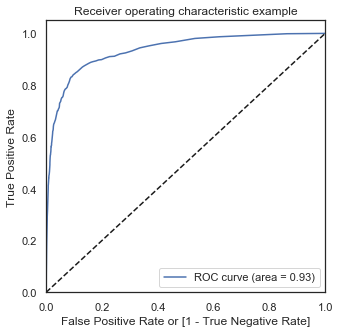

In [95]:
draw_roc(y_test_final.Churn, y_test_final.Churn_Prob)

####  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_final[i]= y_test_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


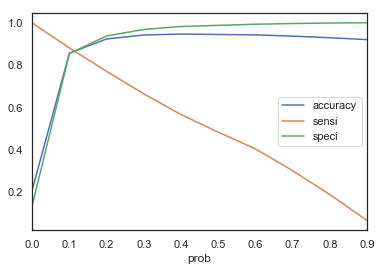

In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_final.Churn, y_test_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [98]:
y_test_final['final_predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
confusion2 = metrics.confusion_matrix(y_test_final.Churn, y_test_final.final_predicted)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate: ",FP/ float(TN+FP))

Sensitivity:  0.8805194805194805
Specificity:  0.8540199174155939
false postive rate:  0.14598008258440612


In [99]:
accuracy = metrics.accuracy_score(y_test_final.Churn, y_test_final.final_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test_final.Churn, y_test_final.final_predicted)
print("recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test_final.Churn, y_test_final.final_predicted)
print("precison: %.2f%%" % (precision * 100.0))

Accuracy: 85.63%
recall: 88.05%
precison: 36.06%


#### Class imbalance handling -creating new balanced training data using 'Upsampling for minority class

In [221]:
# Putting feature variable to X for sampling 
X = tele_clean.drop(['mobile_number', 'circle_id', 'Churn'], axis=1)
# Putting response variable to y
y = tele_clean['Churn']
from sklearn.model_selection import train_test_split
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
from sklearn.utils import resample
# X_train and y_train concatenated back to divide into majority and miniority class
X = pd.concat([X_train, y_train], axis=1)
Churn = X[X.Churn==1]
not_Churn = X[X.Churn==0]
# upsampling the minority class
upsample_churn = resample(Churn,replace=True, n_samples=len(not_Churn), random_state=100)
# now equally sampled majority and mnority is combined together
upsampled = pd.concat([not_Churn, upsample_churn])
print("After upsampling, Churn and not_churn datapoints are:\n",upsampled.Churn.value_counts())

After upsampling, Churn and not_churn datapoints are:
 1    19184
0    19184
Name: Churn, dtype: int64


In [222]:
# Split x and y train data after upsampling
y_train_upsampled = upsampled.Churn
X_train_upsampled = upsampled.drop('Churn', axis=1)

In [223]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_upsampled.iloc[:,:] = scaler.fit_transform(X_train_upsampled.iloc[:,:])
X_train_upsampled.head()

,count_rech_2g_3g_mon_678,totalsachet_2g_3g_mon_678,avg_rech_6_and_7,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
4715,0.006623,0.006623,0.005059,0.0,0.0,0.145946,0.132438,0.065828,0.045593,0.069232,0.039443,0.018528,0.007353,0.006292,0.0,0.0,0.0,0.0,0.0,0.0,0.000157,0.000441,0.000793,0.000351,0.000424,0.000325,0.000000,0.000000,0.000000,0.026425,0.0,0.0,0.000252,0.000676,0.000918,0.045518,0.069035,0.051854,0.014938,0.006666,0.006203,0.0,0.000000,0.0,0.054492,0.057001,0.035916,0.000000,0.000000,0.000000,0.031499,0.005728,0.002107,0.0,0.0,0.0,0.046322,0.055947,0.036686,0.000335,0.001298,0.000470,0.001977,0.004856,0.000880,0.000000,0.000000,0.000000,0.001756,0.004443,0.001224,0.013038,0.011305,0.014490,0.008954,0.017393,0.019134,0.0,0.000000,0.000000,0.020631,0.018670,0.028618,0.018270,0.021250,0.029539,0.007591,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061889,0.200000,0.127551,0.022053,0.007481,0.017456,0.011238,0.0,0.0,0.0,0.000000,0.004988,0.002248,1.0,0.0,0.02,0.000000,0.0,0.010932,0.000000,0.0,0.004515,0.000000,0.0,0.031257,0.000000,0.0,0.000000,0.000000,0.010264,0.007479,0.00572,0.005219,0.004074,0.002831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.041798,0.000000,0.000000,0.000000
15222,0.013245,0.000000,0.005195,0.0,0.0,0.145310,0.133944,0.070459,0.014923,0.003376,0.012186,0.026411,0.012190,0.012064,0.0,0.0,0.0,0.0,0.0,0.0,0.017116,0.003721,0.012186,0.040617,0.018529,0.022188,0.015511,0.025417,0.059645,0.000000,0.0,0.0,0.030530,0.018556,0.026856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005864,0.002354,0.002538,0.0,0.0,0.0,0.031004,0.012792,0.021365,0.003147,0.002039,0.009465,0.102547,0.053612,0.047161,0.056399,0.019430,0.105670,0.091749,0.044146,0.085299,0.000687,0.000505,0.000000,0.000000,0.000000,0.000000,0.0,0.000863,0.000287,0.000687,0.000580,0.000067,0.089397,0.041476,0.077296,0.0000

In [224]:
X_test.iloc[:,:] = scaler.transform(X_test.iloc[:,:])

In [225]:
X_train_upsampled.shape

(38368, 146)

### Step 4.1.7 Seventh Model - Random forest Classifier using upsampled datasets

In [104]:
from sklearn.ensemble import RandomForestClassifier
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {"n_estimators": [80,100]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train_upsampled, y_train_upsampled)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [105]:
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 80}


In [106]:
rfgs_pred=rf_best.predict_proba(X_test)

y_test_pred = pd.DataFrame(rfgs_pred)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [107]:
y_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred[1]})

y_test_final['CustID'] = y_test.index


##### ROC curve

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_final.Churn, y_test_final.Churn_Prob, drop_intermediate = False )

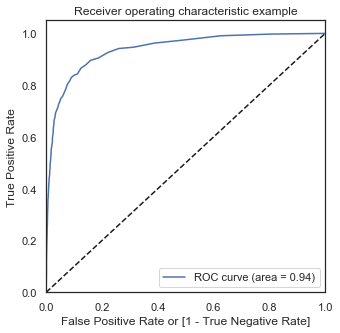

In [109]:
draw_roc(y_test_final.Churn, y_test_final.Churn_Prob)

####  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_final[i]= y_test_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


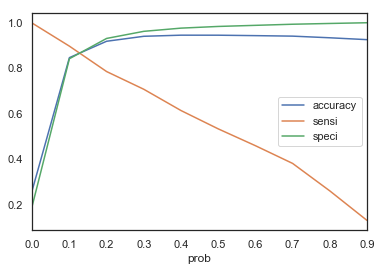

In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_final.Churn, y_test_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [112]:
y_test_final['final_predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
confusion2 = metrics.confusion_matrix(y_test_final.Churn, y_test_final.final_predicted)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate: ",FP/ float(TN+FP))

Sensitivity:  0.8961038961038961
Specificity:  0.840782122905028
false postive rate:  0.15921787709497207


In [113]:
accuracy = metrics.accuracy_score(y_test_final.Churn, y_test_final.final_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test_final.Churn, y_test_final.final_predicted)
print("recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test_final.Churn, y_test_final.final_predicted)
print("precison: %.2f%%" % (precision * 100.0))

Accuracy: 84.55%
recall: 89.61%
precison: 34.48%


 #### Now we need to trace the most significant features in order to build marketing strategies which are customer centric:
 ##### We use Simple logistic regression model and VIF to find the most important variables which make a difference in predicting Churn
    

#### Step 5 The most significant features of Churn

- we model on upsampled data for logistic regression as well to be sure of no imbalance

In [131]:
y_train=y_train_upsampled

In [132]:
X_train=X_train_upsampled 

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train.iloc[:,:] = scaler.fit_transform(X_train.iloc[:,:])
X_train.head()

,count_rech_2g_3g_mon_678,totalsachet_2g_3g_mon_678,avg_rech_6_and_7,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
4715,0.006623,0.006623,0.005059,0.0,0.0,0.145946,0.132438,0.065828,0.045593,0.069232,0.039443,0.018528,0.007353,0.006292,0.0,0.0,0.0,0.0,0.0,0.0,0.000157,0.000441,0.000793,0.000351,0.000424,0.000325,0.000000,0.000000,0.000000,0.026425,0.0,0.0,0.000252,0.000676,0.000918,0.045518,0.069035,0.051854,0.014938,0.006666,0.006203,0.0,0.000000,0.0,0.054492,0.057001,0.035916,0.000000,0.000000,0.000000,0.031499,0.005728,0.002107,0.0,0.0,0.0,0.046322,0.055947,0.036686,0.000335,0.001298,0.000470,0.001977,0.004856,0.000880,0.000000,0.000000,0.000000,0.001756,0.004443,0.001224,0.013038,0.011305,0.014490,0.008954,0.017393,0.019134,0.0,0.000000,0.000000,0.020631,0.018670,0.028618,0.018270,0.021250,0.029539,0.007591,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061889,0.200000,0.127551,0.022053,0.007481,0.017456,0.011238,0.0,0.0,0.0,0.000000,0.004988,0.002248,1.0,0.0,0.02,0.000000,0.0,0.010932,0.000000,0.0,0.004515,0.000000,0.0,0.031257,0.000000,0.0,0.000000,0.000000,0.010264,0.007479,0.00572,0.005219,0.004074,0.002831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.041798,0.000000,0.000000,0.000000
15222,0.013245,0.000000,0.005195,0.0,0.0,0.145310,0.133944,0.070459,0.014923,0.003376,0.012186,0.026411,0.012190,0.012064,0.0,0.0,0.0,0.0,0.0,0.0,0.017116,0.003721,0.012186,0.040617,0.018529,0.022188,0.015511,0.025417,0.059645,0.000000,0.0,0.0,0.030530,0.018556,0.026856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005864,0.002354,0.002538,0.0,0.0,0.0,0.031004,0.012792,0.021365,0.003147,0.002039,0.009465,0.102547,0.053612,0.047161,0.056399,0.019430,0.105670,0.091749,0.044146,0.085299,0.000687,0.000505,0.000000,0.000000,0.000000,0.000000,0.0,0.000863,0.000287,0.000687,0.000580,0.000067,0.089397,0.041476,0.077296,0.0000

In [134]:
X_test.iloc[:,:] = scaler.transform(X_test.iloc[:,:])

In [135]:
import statsmodels.api as sm

#### Checking VIFs

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### As there are explanatory attributes highly correlated, we choose automated feature selection- RFE

####  Feature Selection Using RFE

In [138]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [139]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             
rfe = rfe.fit(X_train, y_train)

#### Ranking of attributes by RFE
#### - the most significant features as per highest ranking by RFE are as follows:

In [140]:
ord=list(zip(X_train.columns, rfe.support_, rfe.ranking_))
ord.sort(key = lambda val: val[2])
rfeord=[i for i in ord[:19]]
rfeord

[('avg_rech_6_and_7', True, 1),
 ('arpu_6', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_mou_8', True, 1),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2m_mou_7', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('monthly_2g_8', True, 1),
 ('monthly_3g_8', True, 1),
 ('total_ic_mou_7', False, 2),
 ('spl_ic_mou_8', False, 3),
 ('loc_og_t2t_mou_8', False, 4),
 ('loc_ic_t2f_mou_6', False, 5)]

#### Correlation of explanatory features with churn

In [141]:
upsamp_corr=tele_clean.corr().Churn.sort_values(ascending=False).head(15)
upsamp_corr

Churn                       1.000000
last_date_of_month_8        0.235812
date_of_last_rech_8         0.217701
date_of_last_rech_data_8    0.162199
std_og_mou_6                0.137936
std_og_t2m_mou_6            0.106372
last_date_of_month_7        0.104564
std_og_t2t_mou_6            0.097457
date_of_last_rech_7         0.094759
roam_og_mou_7               0.093107
total_og_mou_6              0.084416
onnet_mou_6                 0.074631
roam_og_mou_8               0.072375
total_rech_num_6            0.072270
roam_ic_mou_7               0.068258
Name: Churn, dtype: float64

In [142]:
col = X_train.columns[rfe.support_]

In [143]:
X_train.columns[~rfe.support_]

Index(['count_rech_2g_3g_mon_678', 'totalsachet_2g_3g_mon_678',
       'last_date_of_month_7', 'last_date_of_month_8', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       ...
       'monthly_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=131)

#### Assessing the model with StatsModels

In [144]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38352
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17128.
Date:                Mon, 04 Nov 2019   Deviance:                       34255.
Time:                        20:12:50   Pearson chi2:                 4.67e+05
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4172      0.162      2.581      0.010       0.100       0.734
avg_rech_6_and_7      15.2855      1.348     11.343      0.000      12.644      17.927
arpu_6                 5.3867      1.053      5.115      0.000       3.323       7.451
loc_og_t2m_mou_8       1.3159      1.587      0.829      0.407      -1.794       4.426
loc_og_mou_8         -24.6269      2.667     -9.233      0.000     -29.855     -19.399
total_og_mou_7         6.0743      0.408     14.889      0.000       5.275       6.874
total_og_mou_8       -17.2471      0.659    -26.174      0.000     -18.539     -15.956
loc_ic_t2m_mou_7      14.1614      0.756     18.744      0.000      12.681      15.642
loc_ic_t2m_mou_8     -17.6360      2.395     -7.362      0.000     -22.331     -12.941
loc_ic_mou_8         -14.0296      1.808     -7.759      0.000     -17.573     -10.486
total_ic_mou_8        -8.6042      0.888     -9.687      0.000     -10.345      -6.863
total_rech_num_8      -6.1800      0.420    -14.712      0.000      -7.003      -5.357
last_day_rch_amt_8   -12.9511      0.588    -22.033      0.000     -14.103     -11.799
total_rech_data_8     -9.0345      0.610    -14.803      0.000     -10.231      -7.838
monthly_2g_8          -6.2454      0.335    -18.638      0.000      -6.902      -5.589
monthly_3g_8          -7.2116      0.434    -16.635      0.000      -8.061      -6.362
======================================================================================
"""

In [145]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)


##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [146]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index


#### Checking VIFs

In [147]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,11.77
7,loc_ic_t2m_mou_8,7.91
9,total_ic_mou_8,7.62
3,loc_og_mou_8,4.50
2,loc_og_t2m_mou_8,4.33
5,total_og_mou_8,4.12
4,total_og_mou_7,3.87
1,arpu_6,3.48
6,loc_ic_t2m_mou_7,3.38
10,total_rech_num_8,2.85


In [149]:
col=col.drop("loc_ic_mou_8")

In [150]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38353
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17160.
Date:                Mon, 04 Nov 2019   Deviance:                       34321.
Time:                        20:13:04   Pearson chi2:                 4.83e+05
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4059      0.162      2.505      0.012       0.088       0.723
avg_rech_6_and_7      15.4916      1.366     11.342      0.000      12.815      18.169
arpu_6                 5.4037      1.056      5.117      0.000       3.334       7.474
loc_og_t2m_mou_8       4.9813      1.594      3.124      0.002       1.856       8.106
loc_og_mou_8         -32.2434      2.656    -12.140      0.000     -37.449     -27.038
total_og_mou_7         6.1943      0.410     15.115      0.000       5.391       6.998
total_og_mou_8       -17.2364      0.659    -26.160      0.000     -18.528     -15.945
loc_ic_t2m_mou_7      13.9189      0.748     18.607      0.000      12.453      15.385
loc_ic_t2m_mou_8     -29.3232      1.778    -16.491      0.000     -32.808     -25.838
total_ic_mou_8       -12.7274      0.794    -16.034      0.000     -14.283     -11.172
total_rech_num_8      -6.1098      0.420    -14.549      0.000      -6.933      -5.287
last_day_rch_amt_8   -12.9965      0.589    -22.054      0.000     -14.151     -11.841
total_rech_data_8     -9.0398      0.610    -14.828      0.000     -10.235      -7.845
monthly_2g_8          -6.3093      0.335    -18.838      0.000      -6.966      -5.653
monthly_3g_8          -7.1942      0.433    -16.619      0.000      -8.043      -6.346
======================================================================================
"""

#### Checking VIFs

In [151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_t2m_mou_8,5.95
3,loc_og_mou_8,4.28
2,loc_og_t2m_mou_8,4.27
5,total_og_mou_8,4.10
8,total_ic_mou_8,4.08
4,total_og_mou_7,3.87
1,arpu_6,3.48
6,loc_ic_t2m_mou_7,3.38
9,total_rech_num_8,2.85
0,avg_rech_6_and_7,2.27


In [152]:
col=col.drop("loc_ic_t2m_mou_8")

In [153]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38354
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17305.
Date:                Mon, 04 Nov 2019   Deviance:                       34610.
Time:                        20:13:08   Pearson chi2:                 8.40e+05
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5076      0.163      3.120      0.002       0.189       0.827
avg_rech_6_and_7      17.2817      1.359     12.713      0.000      14.617      19.946
arpu_6                 4.8881      1.061      4.609      0.000       2.809       6.967
loc_og_t2m_mou_8      -0.6323      1.560     -0.405      0.685      -3.689       2.425
loc_og_mou_8         -29.9520      2.617    -11.447      0.000     -35.081     -24.823
total_og_mou_7         7.0455      0.413     17.059      0.000       6.236       7.855
total_og_mou_8       -18.4254      0.663    -27.784      0.000     -19.725     -17.126
loc_ic_t2m_mou_7       6.5583      0.538     12.180      0.000       5.503       7.614
total_ic_mou_8       -21.3286      0.720    -29.616      0.000     -22.740     -19.917
total_rech_num_8      -6.4267      0.421    -15.259      0.000      -7.252      -5.601
last_day_rch_amt_8   -13.3243      0.593    -22.484      0.000     -14.486     -12.163
total_rech_data_8     -9.2028      0.606    -15.176      0.000     -10.391      -8.014
monthly_2g_8          -6.3504      0.334    -19.036      0.000      -7.004      -5.697
monthly_3g_8          -7.3801      0.433    -17.042      0.000      -8.229      -6.531
======================================================================================
"""

#### Checking VIFs

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,4.26
5,total_og_mou_8,4.09
2,loc_og_t2m_mou_8,4.04
4,total_og_mou_7,3.84
1,arpu_6,3.47
8,total_rech_num_8,2.85
7,total_ic_mou_8,2.61
6,loc_ic_t2m_mou_7,2.35
0,avg_rech_6_and_7,2.27
9,last_day_rch_amt_8,1.47


In [155]:
col=col.drop("loc_og_mou_8")

In [156]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38355
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17400.
Date:                Mon, 04 Nov 2019   Deviance:                       34801.
Time:                        20:13:12   Pearson chi2:                 1.36e+06
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4853      0.163      2.978      0.003       0.166       0.805
avg_rech_6_and_7      17.2279      1.382     12.464      0.000      14.519      19.937
arpu_6                 4.9610      1.064      4.664      0.000       2.876       7.046
loc_og_t2m_mou_8     -16.3990      0.770    -21.286      0.000     -17.909     -14.889
total_og_mou_7         7.0030      0.412     16.999      0.000       6.196       7.810
total_og_mou_8       -19.2999      0.662    -29.140      0.000     -20.598     -18.002
loc_ic_t2m_mou_7       7.1792      0.547     13.124      0.000       6.107       8.251
total_ic_mou_8       -23.6243      0.713    -33.139      0.000     -25.022     -22.227
total_rech_num_8      -6.1712      0.417    -14.803      0.000      -6.988      -5.354
last_day_rch_amt_8   -13.3823      0.594    -22.530      0.000     -14.546     -12.218
total_rech_data_8     -9.3430      0.607    -15.392      0.000     -10.533      -8.153
monthly_2g_8          -6.3717      0.333    -19.142      0.000      -7.024      -5.719
monthly_3g_8          -7.3685      0.433    -17.016      0.000      -8.217      -6.520
======================================================================================
"""

#### Checking VIFs

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_7,3.84
4,total_og_mou_8,3.83
1,arpu_6,3.47
7,total_rech_num_8,2.82
6,total_ic_mou_8,2.56
5,loc_ic_t2m_mou_7,2.35
0,avg_rech_6_and_7,2.27
2,loc_og_t2m_mou_8,2.07
8,last_day_rch_amt_8,1.47
9,total_rech_data_8,1.39


In [160]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final['Churn_Prob'] = y_train_pred

In [161]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [162]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

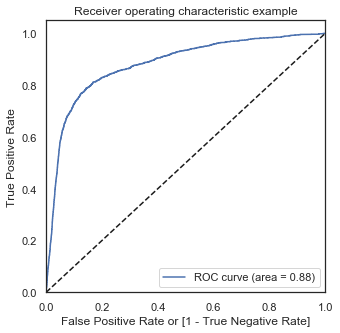

In [163]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### 4.8 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [164]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


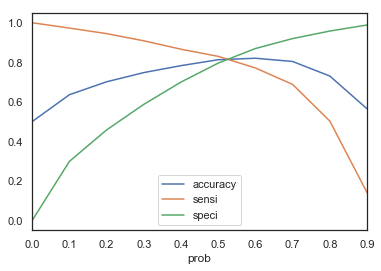

In [165]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, checking optimum point to take it as a cutoff probability.

In [167]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.812890950792327

In [169]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )


TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [735]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.817556296914095

In [921]:
upsamp_corr

Churn                       1.000000
date_of_last_rech_data_8    0.310450
date_of_last_rech_8         0.221437
std_og_mou_6                0.202834
last_date_of_month_8        0.177038
std_og_t2m_mou_6            0.154338
std_og_t2t_mou_6            0.138885
total_og_mou_6              0.127224
roam_og_mou_7               0.114494
total_rech_num_6            0.113506
onnet_mou_6                 0.108303
arpu_6                      0.103492
roam_og_mou_8               0.093032
offnet_mou_6                0.092450
date_of_last_rech_7         0.091921
Name: Churn, dtype: float64

In [170]:
corcol=['roam_og_mou_7',
 'loc_og_t2m_mou_8',
 'total_og_mou_8',
 'loc_ic_t2m_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'monthly_2g_8',
 'monthly_3g_8',
 'arpu_2g_7',
 'std_ic_t2t_mou_6']

In [171]:
# Let's re-run the model using the selected variables "corcol"
X_train_sm = sm.add_constant(X_train[corcol])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38354
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17673.
Date:                Mon, 04 Nov 2019   Deviance:                       35345.
Time:                        20:15:52   Pearson chi2:                 4.82e+05
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1470      0.028     40.298      0.000       1.091       1.203
roam_og_mou_7          4.2076      0.250     16.828      0.000       3.718       4.698
loc_og_t2m_mou_8     -15.5054      0.758    -20.449      0.000     -16.992     -14.019
total_og_mou_8        -6.2225      0.445    -13.984      0.000      -7.095      -5.350
loc_ic_t2m_mou_7      11.4742      0.533     21.511      0.000      10.429      12.520
total_ic_mou_8       -28.3526      0.744    -38.102      0.000     -29.811     -26.894
total_rech_num_6       9.2966      0.521     17.861      0.000       8.276      10.317
total_rech_num_8     -10.2438      0.477    -21.491      0.000     -11.178      -9.310
last_day_rch_amt_8   -12.4008      0.620    -20.003      0.000     -13.616     -11.186
total_rech_data_8    -10.8732      0.627    -17.354      0.000     -12.101      -9.645
monthly_2g_8          -6.2563      0.334    -18.759      0.000      -6.910      -5.603
monthly_3g_8          -9.6895      0.526    -18.410      0.000     -10.721      -8.658
arpu_2g_7              5.9110      0.398     14.866      0.000       5.132       6.690
std_ic_t2t_mou_6      17.0224      1.216     13.994      0.000      14.638      19.406
======================================================================================
"""

In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train[corcol].columns
vif['VIF'] = [variance_inflation_factor(X_train[corcol].values, i) for i in range(X_train[corcol].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_rech_num_8,3.30
4,total_ic_mou_8,2.61
2,total_og_mou_8,2.40
3,loc_ic_t2m_mou_7,2.29
1,loc_og_t2m_mou_8,2.06
5,total_rech_num_6,2.04
11,arpu_2g_7,1.61
10,monthly_3g_8,1.58
8,total_rech_data_8,1.42
7,last_day_rch_amt_8,1.37


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [173]:
X_testup = X_test[corcol]
X_testup.head()

,roam_og_mou_7,loc_og_t2m_mou_8,total_og_mou_8,loc_ic_t2m_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,monthly_2g_8,monthly_3g_8,arpu_2g_7,std_ic_t2t_mou_6
29360,0.000000,0.000238,0.000731,0.038731,0.039074,0.097720,0.000000,0.000000,0.000000,0.0,0.0,0.004056,0.000000
49979,0.000532,0.000369,0.023295,0.008426,0.002527,0.026059,0.020408,0.056192,0.000000,0.0,0.0,0.004056,0.021115
90612,0.000000,0.005359,0.002790,0.021858,0.031901,0.022801,0.030612,0.056642,0.033333,0.0,0.2,0.070400,0.000000
87007,0.000000,0.040072,0.016199,0.081001,0.048023,0.107492,0.178571,0.006743,0.000000,0.0,0.0,0.004056,0.000143
91852,0.000000,0.000050,0.107845,0.035525,0.028576,0.048860,0.056122,0.005170,0.000000,0.0,0.0,0.004056,0.000350


In [174]:
X_test_sm = sm.add_constant(X_testup)

Making predictions on the test set

In [175]:
y_test_pred = res.predict(X_test_sm)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [177]:
y_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})

y_test_final['CustID'] = y_test.index


##### ROC curve

In [178]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_final.Churn, y_test_final.Churn_Prob, drop_intermediate = False )

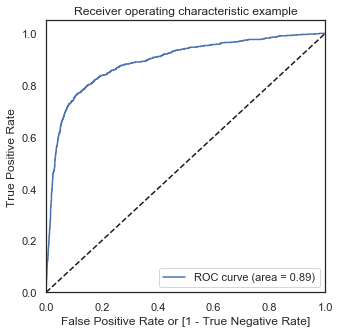

In [179]:
draw_roc(y_test_final.Churn, y_test_final.Churn_Prob)

####  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [180]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_final[i]= y_test_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


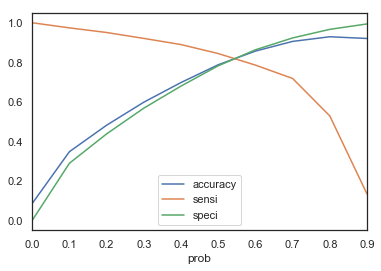

In [181]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_final.Churn, y_test_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [182]:
y_test_final['final_predicted'] = y_test_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
confusion2 = metrics.confusion_matrix(y_test_final.Churn, y_test_final.final_predicted)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate: ",FP/ float(TN+FP))

Sensitivity:  0.8441558441558441
Specificity:  0.7821229050279329
false postive rate:  0.21787709497206703


In [183]:
accuracy = metrics.accuracy_score(y_test_final.Churn, y_test_final.final_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = metrics.recall_score(y_test_final.Churn, y_test_final.final_predicted)
print("recall: %.2f%%" % (recall * 100.0))
precision = metrics.precision_score(y_test_final.Churn, y_test_final.final_predicted)
print("precison: %.2f%%" % (precision * 100.0))

Accuracy: 78.74%
recall: 84.42%
precison: 26.60%


### Step 6: Conclusions:

#### The above features used to build the final logistic regression model have low VIFs 
- which means they are not correlated and also the model shows decent performance on test data having accuracy of 78% and recall 84 

In [187]:
print("Most significant features that play a role in predciting churn are : \n")
for i in corcol:
    print(i)

Most significant features that play a role in predciting churn are : 

roam_og_mou_7
loc_og_t2m_mou_8
total_og_mou_8
loc_ic_t2m_mou_7
total_ic_mou_8
total_rech_num_6
total_rech_num_8
last_day_rch_amt_8
total_rech_data_8
monthly_2g_8
monthly_3g_8
arpu_2g_7
std_ic_t2t_mou_6


### Step 6: Results and Conclusions 

### Now after assessing all models we have found the best model:
-Random forest classifier with class_weights as balanced using original training data without upsampling, with following metrics:
- Sensitivity:  0.84
- Specificity:  0.90
- False postive rate:  0.10
- Accuracy: 89.28%
- recall: 84.03%
- precison: 43.45%
    
at Step 4.1.5